# **Multiple Linear Regression Model for Boston Housing Pricing**

**About the Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000 dollars's

**Target Variable**

In the given dataset, column named MEDV is taken to be the target variable. The dataset is being used to build a model which could predict the median value of the owner occupied house based on the values of various influencing factors hereby reffered to as features. 

**Steps in Building Model**
1. Reading the dataset.
2. Data imputation and cleaning.
3. Exploratory Data Analysis.
4. Splitting and scaling the data.
5. Model building.
6. Model evaluation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings 
warnings.filterwarnings("ignore")

# Reading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\kisla\Downloads\BostonHousing.csv")   #loading thr dataset
df.head(10)                                                       #displaying first 10 rows 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Data Description and Cleaning

In [4]:
df.shape

(506, 14)

The dataset consists of 506 rows and 13 columns. Out of these 13 columns, 12 will be considered as independent variables or Features and the remaining 1 will be dependent variable or Target. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


All the columns in the dataset are formed of numerical values with 11 columns having float values and rest 3 are having integer values. There are no categorical values in the dataset. 

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The above table gives a 5-point summary of our dataset giving information about the min value, 1st quantile, 2nd quantile, 3rd quantile and max value in each of the column of the dataset. 

In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

There is no null value in the datset. All the columns are free from null values. 

In [8]:
df.duplicated().sum()

0

There is no duplicate values in the dataset. 

In [9]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")

crim : [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200

In [10]:
(df.nunique(axis = 0, dropna = True)/ df.shape[0]) *100

crim       99.604743
zn          5.138340
indus      15.019763
chas        0.395257
nox        16.007905
rm         88.142292
age        70.355731
dis        81.422925
rad         1.778656
tax        13.043478
ptratio     9.090909
b          70.553360
lstat      89.920949
medv       45.256917
dtype: float64

Above list shows the count of the distinct elements in the features expreseed as a percentage of the nunmber of datapoints in the column. It also shows the unique elements in the dataset. 

# Exploratory Data Analysis

There are no categorical values, so we will be carrying out graphical visualization of numerical data only.

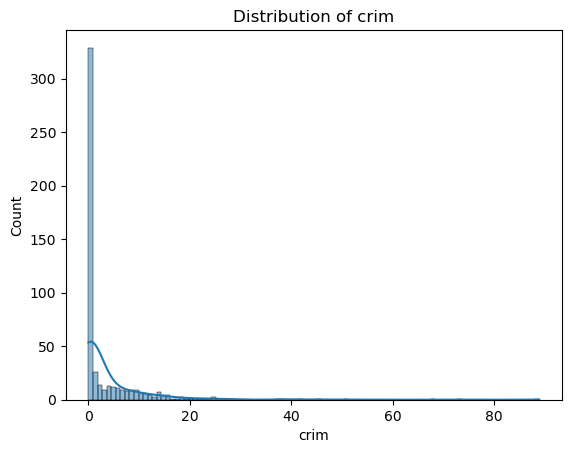

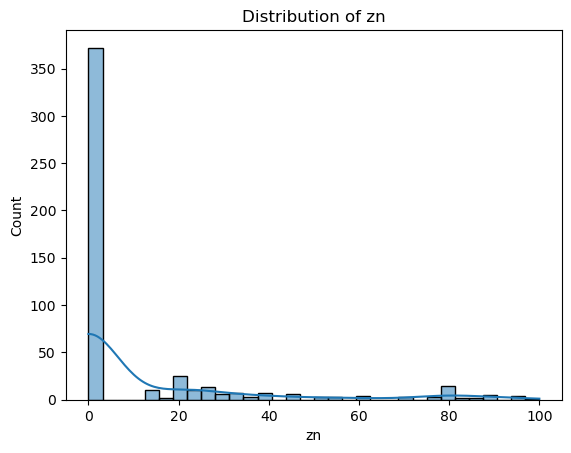

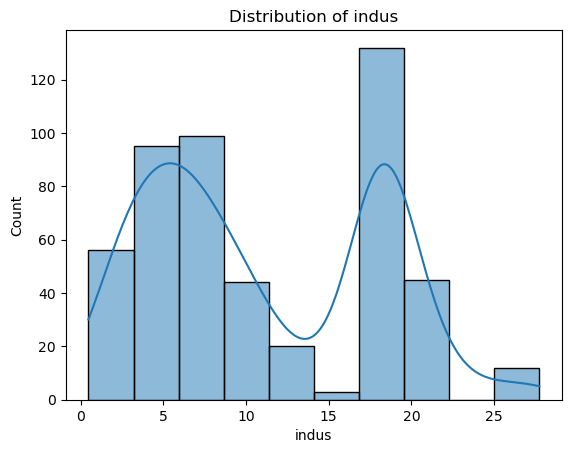

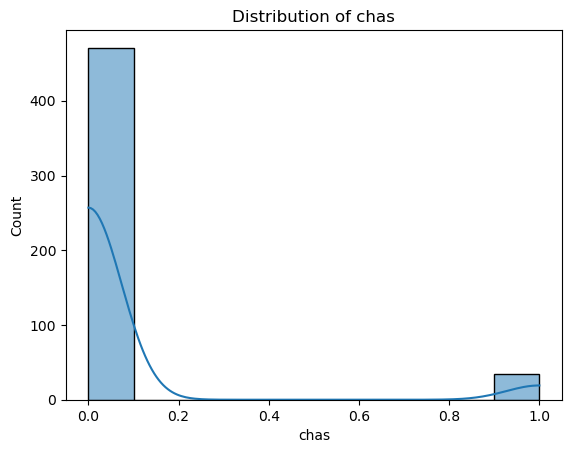

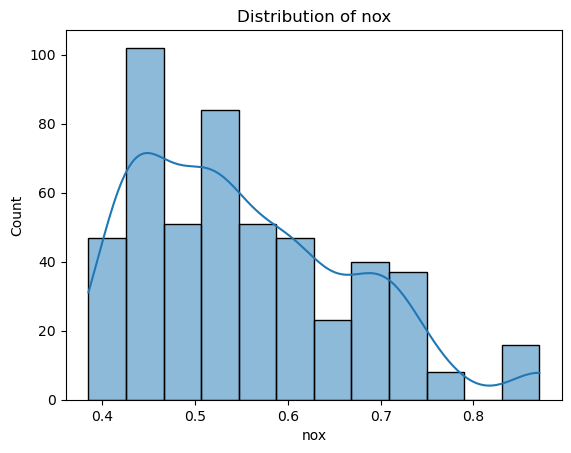

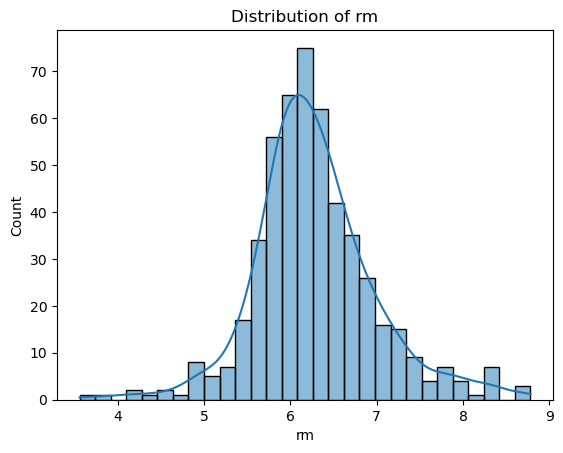

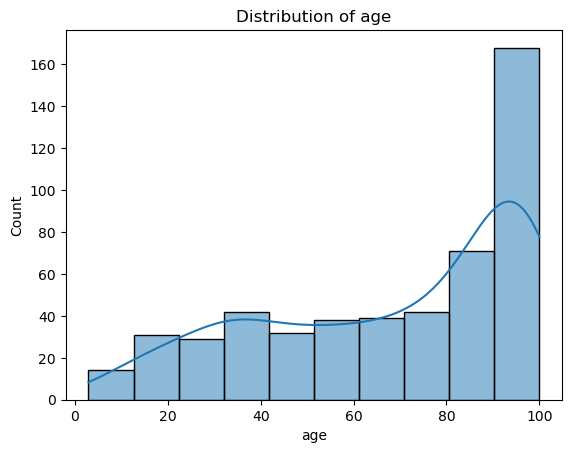

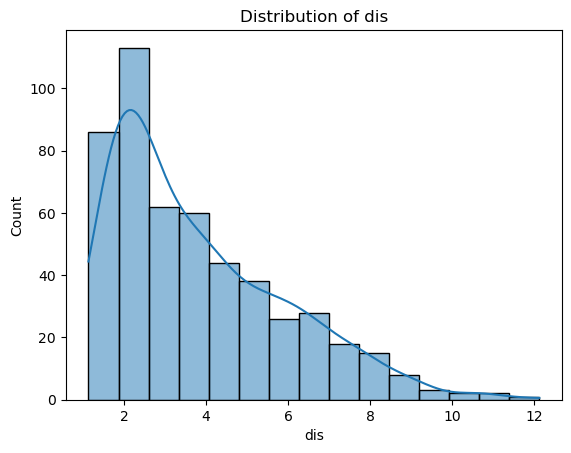

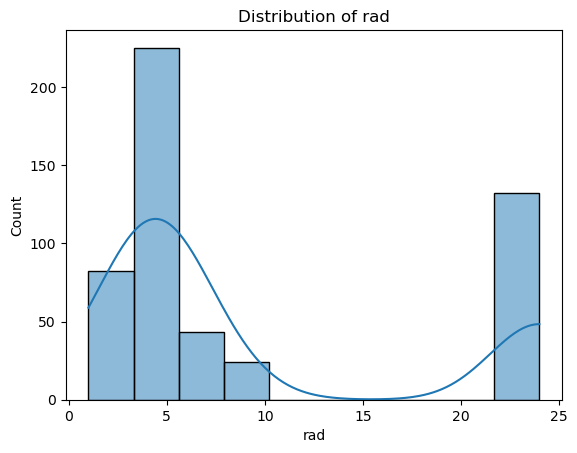

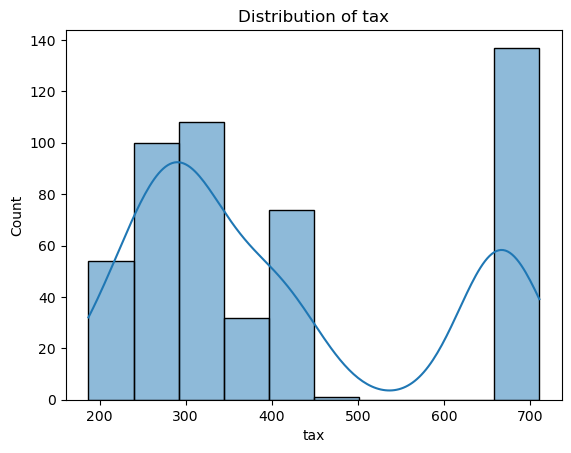

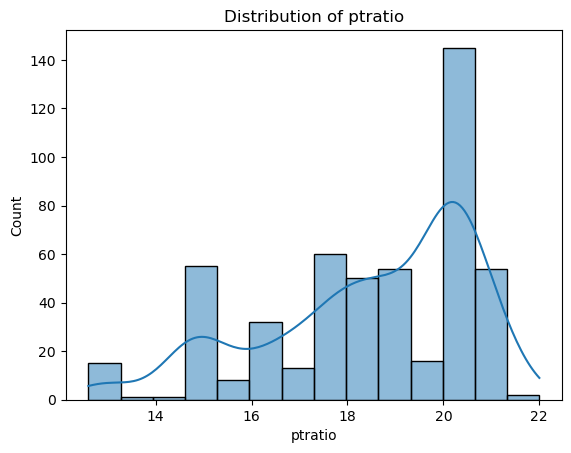

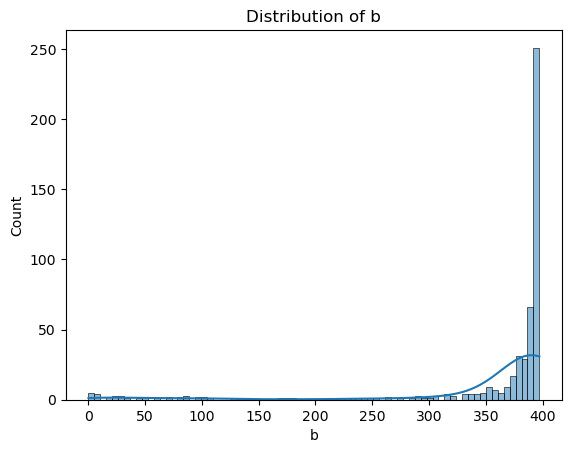

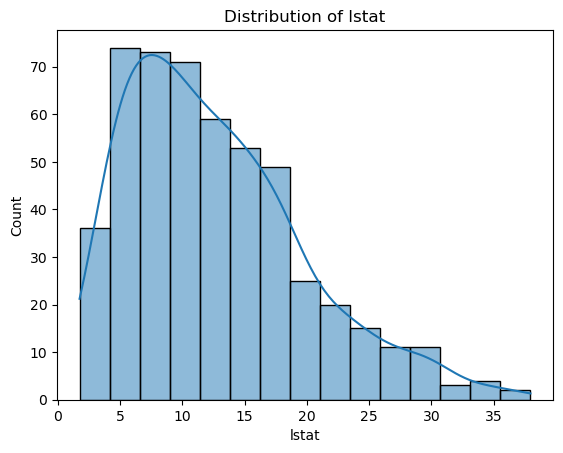

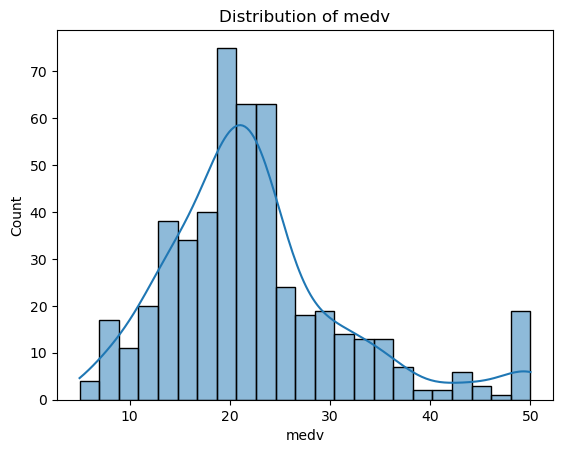

<Figure size 640x480 with 0 Axes>

In [11]:
for column in df.columns:
    sns.histplot(df[column], kde = 'True')
    plt.title(f"Distribution of {column}")
    plt.show()
plt.tight_layout()

The above plots describes the distribution of values in each column. It demonstrates the spread of data points in each column. 

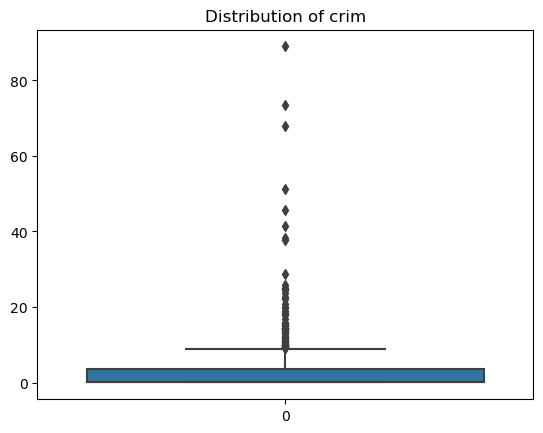

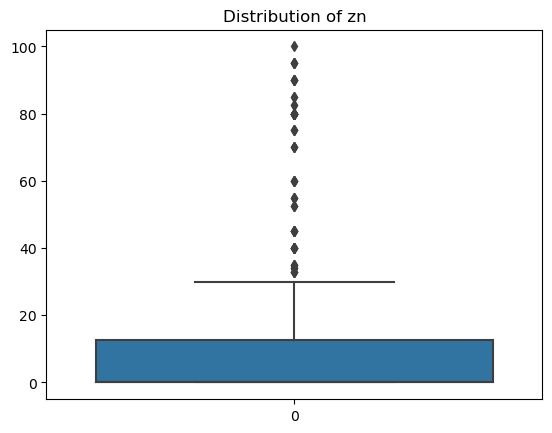

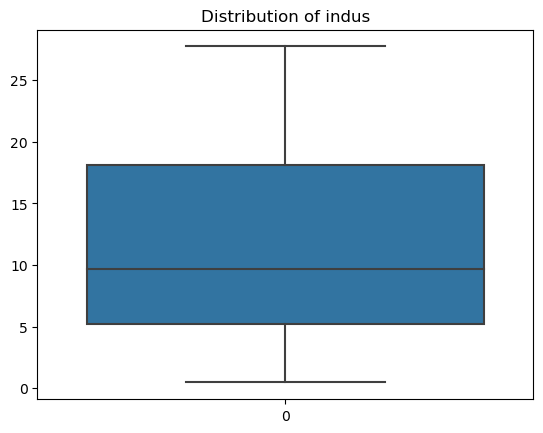

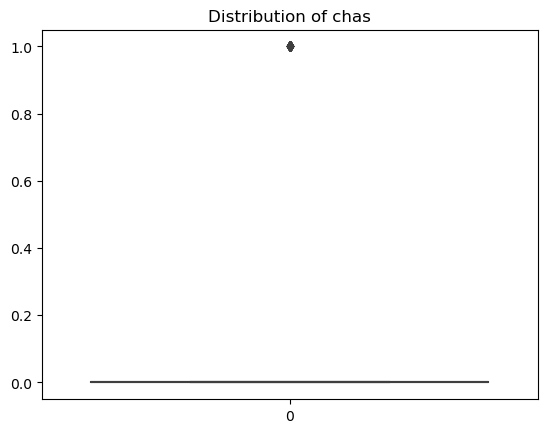

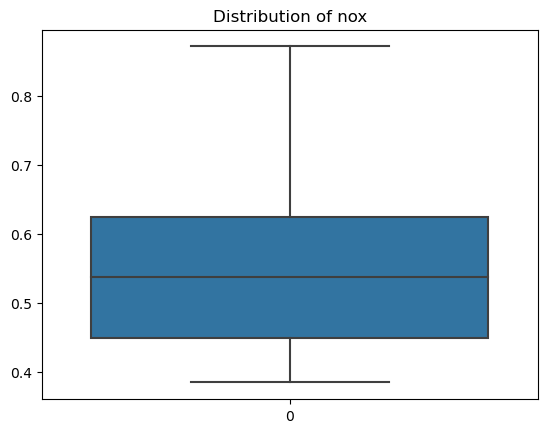

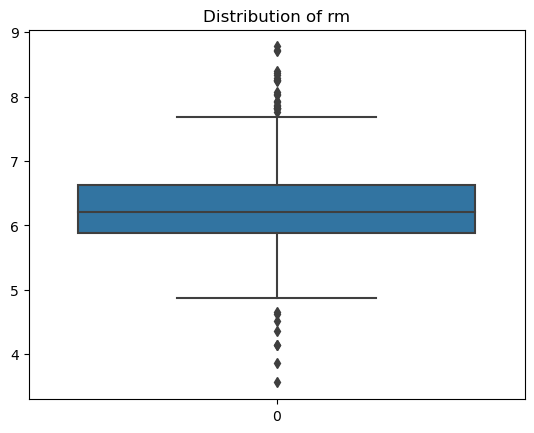

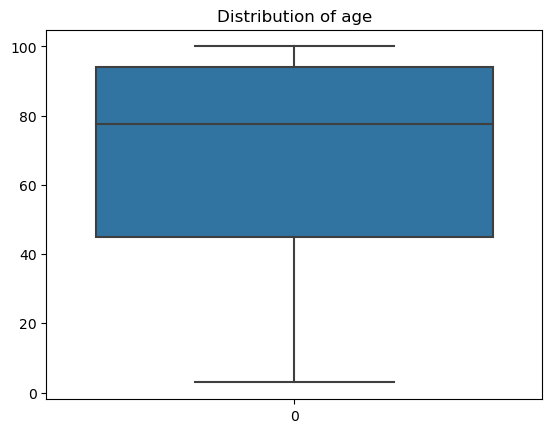

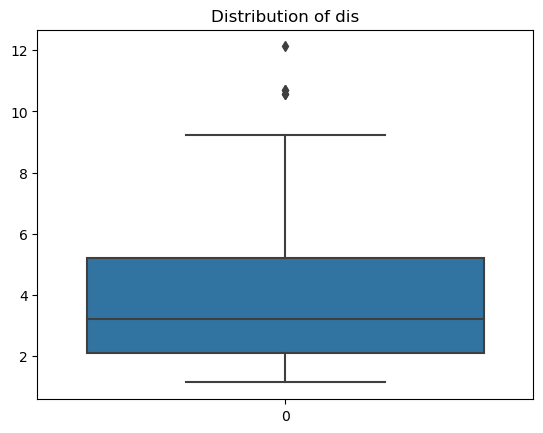

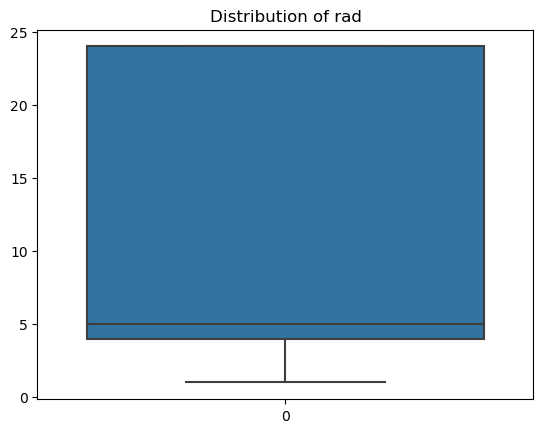

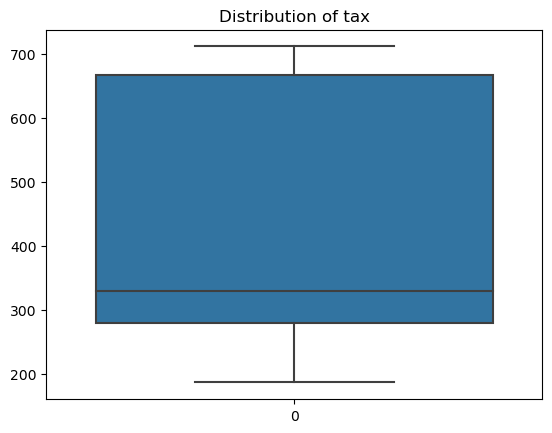

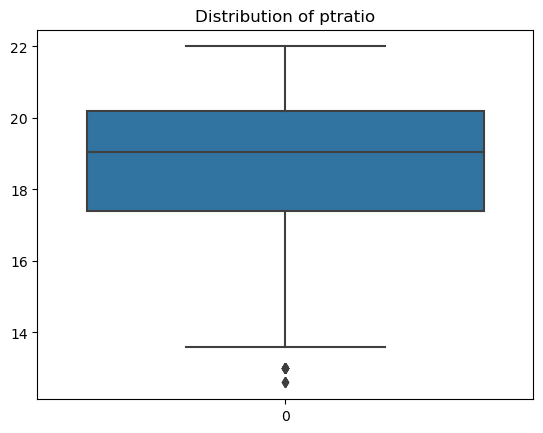

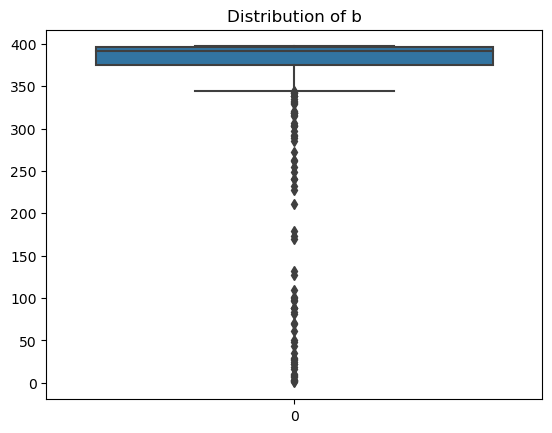

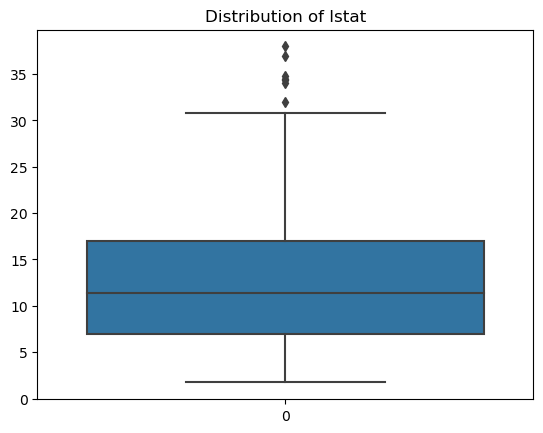

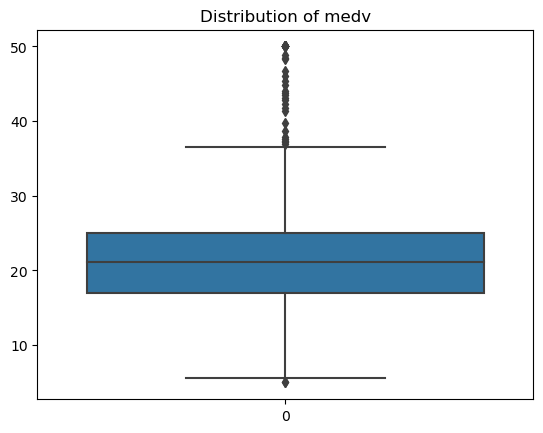

In [12]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

Above are the box plots for the different columns or features in the dataset. The boxplots gives the details of the distribution of the data points in the column and it also tells about the presence of the outliers in the dataset. There are few features as in crim, zn and b having a large amount of outliers among the datapoints. Other features namely rm, dis, ptratio and lstat are having a considerably lesser amount of outliers among the datapoints. Outlier treatment needs to be done to find out about the amount of outliers in the column . 

**Outlier Treatment**

In [13]:
def outliers(column):                           # a function to determine the outlier position in the column
    q1 = float(np.quantile(df[column], 0.25))   # calculating quantile 1
    q3 = float(np.quantile(df[column], 0.75))   # calculating quantile 3
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr                  # determing the value of lower bound 
    upper_limit = q3 + 1.5*iqr                  # determining the value of upper bound 
    upper = np.where(df[column] > upper_limit)[0] # outlier index above upper bound 
    lower = np.where(df[column] < lower_limit)[0] # outlier index below lower bound 
    return upper, lower                           # returning the list of indexes 

The function above returns the indexes of the datapoints that are sought to be outlier and process of determining wheter they are outlier or not is based on the IQR method. 

In [14]:
list_1 = []
for columns in df.columns:
    upper, lower = outliers(columns)
    total = upper.shape[0] + lower.shape[0]
    percentage = total / df.shape[0] * 100
    print(f"The percent of outliers in column {columns} is {percentage}")
    if percentage > 5.0:
        list_1.append(columns)    
list_1.remove('chas')
list_1.remove('medv')


The percent of outliers in column crim is 13.043478260869565
The percent of outliers in column zn is 13.438735177865613
The percent of outliers in column indus is 0.0
The percent of outliers in column chas is 6.91699604743083
The percent of outliers in column nox is 0.0
The percent of outliers in column rm is 5.928853754940711
The percent of outliers in column age is 0.0
The percent of outliers in column dis is 0.9881422924901186
The percent of outliers in column rad is 0.0
The percent of outliers in column tax is 0.0
The percent of outliers in column ptratio is 2.9644268774703555
The percent of outliers in column b is 15.217391304347828
The percent of outliers in column lstat is 1.383399209486166
The percent of outliers in column medv is 7.905138339920949


Above line of code calls the outlier function for each of the feature in the dataset and eventually determines the percentage of values that are outliers in that particular feature. 

In [15]:
cor= df.corr()
cor    # getting a correlation matrix of the features to know the type of relationship between them

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
df.drop(['zn'], axis = 1, inplace = True)
df

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


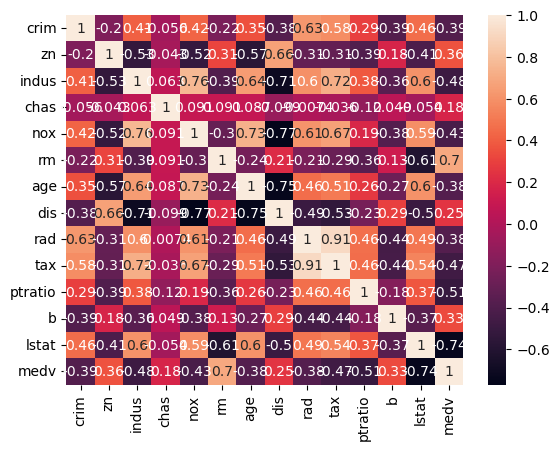

<Figure size 2000x2000 with 0 Axes>

In [17]:
sns.heatmap(cor, annot = True)
plt.figure(figsize = (20,20))
plt.show()

The heatmap above shows graphically the relationship of the features among each other. It measures the relationship on a scale of -1 to +1, with the two being extreme values and the sign representing the nature of relationship (direct or inverse). As is clear from the heatmap, the features chas and b have a very less effect on the target medv, so these variables can be dropped before developing a machine learning model based on multiple linear regression. 

# Splitting and Scaling of Data

In [18]:
# splitting the data in X i.e. features and Y i.e. target
X = df.drop(['medv', 'chas', 'b'], axis = 1)    # selecting features
Y = df['medv']        # selecting target
X.head(10)            # displaying top 10 rows of data frame with features

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
5,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
6,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,12.43
7,0.14455,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
8,0.21124,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,29.93
9,0.17004,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,17.10


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state = 1)    # splitting of training and testing dataset from the dataframe
df.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape                              # checking the shape of the train and test datasets for both  X and Y, i.e., features and target

((506, 13), (404, 10), (102, 10), (404,), (102,))

Now the original data has been split into a training data and a testing data in the ratio of 4:1. Training data will be used to train the model for prediction. Using the training data, the machine will try to understand the underlying mathematical relationhip. The testing data will be used to test the accuracy of the prepared prediction model using unknown data. Now before moving on towards making of the model, we need to scale the features to a particular standard. Right now, the values in different columns of the features dataset are on different scale and can't be compared on a common standard. Scaling them will bring them on a standard scale and makes it easier for the machine to compare them. So moving on with the scaling part.

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat'])
X_test =  pd.DataFrame(X_test, columns = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat'])
X_train

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,lstat
0,-0.389249,-0.609290,-0.899583,-0.144968,-2.150030,0.894455,-0.746330,-1.008508,-0.248578,-0.966850
1,-0.387832,-0.869526,-0.856756,-0.179832,-1.357820,1.882903,-0.169594,-0.706413,0.582147,-0.821168
2,1.435550,1.026692,1.258877,-1.440773,1.057367,-1.132950,1.675959,1.556337,0.812904,2.501775
3,-0.398558,0.256216,-0.993801,-0.053448,-0.499009,0.560803,-0.515636,-0.031142,0.120633,-0.060845
4,0.557683,1.026692,0.265300,-1.022396,0.093395,-0.832059,1.675959,1.556337,0.812904,0.607906
...,...,...,...,...,...,...,...,...,...,...
399,-0.400855,-1.087365,-1.379241,-0.570608,-1.711861,2.546384,-0.977024,-0.522787,-0.940849,-0.489567
400,-0.394707,-0.039109,-1.199369,-0.296048,-2.107965,0.689770,-0.630983,-0.582021,0.351390,-1.007086
401,0.238040,1.026692,1.198920,0.197869,0.983754,-1.014605,1.675959,1.556337,0.812904,0.914532
402,-0.368566,-0.713092,-0.394229,-0.265541,-0.225592,-0.082238,-0.169594,-0.570174,-0.479335,-0.263413


In [21]:
X_test

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,lstat
0,-0.399340,-1.300817,-0.694015,0.842866,0.082879,-0.303729,-0.284942,-1.073665,-0.017821,-0.728209
1,-0.401955,-1.066897,-0.591232,0.620603,-0.404365,0.899742,-0.515636,-0.196998,-0.387032,-0.776769
2,-0.379642,-0.609290,-0.899583,-0.346892,0.615692,0.879585,-0.746330,-1.008508,-0.248578,0.835448
3,-0.398402,-0.732098,-1.233630,-0.567702,-1.631238,1.261294,-0.630983,-0.345084,0.212936,-0.649124
4,-0.002106,1.026692,1.858449,-1.317293,0.990765,-0.813129,1.675959,1.556337,0.812904,-0.359147
...,...,...,...,...,...,...,...,...,...,...
97,-0.400138,0.579319,-0.762538,0.251619,-0.502515,-0.075629,-0.630983,-0.789341,-0.110124,-0.640799
98,-0.370221,-0.713092,-0.419925,2.901337,0.363307,-0.439824,-0.169594,-0.570174,-0.479335,-1.198554
99,-0.392924,-0.368059,-0.282880,-0.107197,-0.474472,-0.494866,-0.515636,-0.114070,1.135964,0.030727
100,0.935890,1.026692,0.265300,-0.627263,-0.288688,-0.863168,1.675959,1.556337,0.812904,0.403951


Now the data has been scaled to the same standard, we are good to go to implement multiple linear regression on the data.

# Model Building

In [22]:
regressor = LinearRegression()     # creating an instance of the LinearRegression class
regressor.fit(X_train, Y_train)    # fitting the data to the regression model
names = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio','lstat']
values = list(regressor.coef_)
coeff = dict(zip(names, values))
coeff = pd.DataFrame(list(coeff.items()), columns = ['Feature_Name', 'Coefficient'])    # creating a dataframe of the coefficients for each feature
coeff.set_index('Feature_Name', inplace = True)                     
coeff                                                                                   # coeffcients for each feature in a tabular form 

,Coefficient
Feature_Name,
crim,-1.032596
indus,-0.039569
nox,-2.320835
rm,2.298127
age,0.085602
dis,-2.413709
rad,2.303216
tax,-1.441298
ptratio,-2.540904


In [23]:
intercept = regressor.intercept_
print(f"The value of the intercept for the linear regression model is {intercept}")

The value of the intercept for the linear regression model is 22.522277227722775


The linear regression model has been prepared and the model has been trained over the training data. The parameters of the model are as mentioned.

**Prediction Using The Model**

In [24]:
Y_predict = regressor.predict(X_test)    # Predicting the value of target based on testing data
X_test_1 = X_test.copy()
X_test_1['Predicted Value'] = Y_predict
X_test_1.head(10)

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,Predicted Value
0,-0.399340,-1.300817,-0.694015,0.842866,0.082879,-0.303729,-0.284942,-1.073665,-0.017821,-0.728209,31.157025
1,-0.401955,-1.066897,-0.591232,0.620603,-0.404365,0.899742,-0.515636,-0.196998,-0.387032,-0.776769,26.794343
2,-0.379642,-0.609290,-0.899583,-0.346892,0.615692,0.879585,-0.746330,-1.008508,-0.248578,0.835448,19.144387
3,-0.398402,-0.732098,-1.233630,-0.567702,-1.631238,1.261294,-0.630983,-0.345084,0.212936,-0.649124,22.466565
4,-0.002106,1.026692,1.858449,-1.317293,0.990765,-0.813129,1.675959,1.556337,0.812904,-0.359147,18.195481
5,-0.340149,1.580791,0.607913,0.149930,1.050356,-0.707482,-0.630983,0.199872,1.274418,-0.230114,19.493791
6,-0.400781,-0.895842,-1.216500,0.524725,-1.561131,0.609236,-0.630983,-0.937427,0.351390,-1.120857,28.936865
7,-0.256445,-0.429463,-0.128704,-0.285879,1.123968,0.164697,-0.630983,-0.570174,1.182115,0.036276,18.362550
8,-0.392622,0.411188,-0.025921,-0.461655,0.906636,-0.442231,-0.515636,-0.753800,-0.940849,0.713352,22.458687
9,-0.399611,-1.120991,-0.548405,0.215301,-0.064346,-0.346403,-0.861677,-0.789341,-0.294729,-0.550615,27.707291


Above table shows the value predicted by the machine based on the feature data provided as testing data.

# Model Evaluation

In [25]:
mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, Y_predict)    
print(f"The mean square error in the predictions of the developed model is {mse}")
print(f"The mean absolute error in the predictions of the developed model is {mae}")
print(f"The root mean square error in the predictions of the developed model is {rmse}")
print(f"The r^2 score of the developed model is {r2_value}")

The mean square error in the predictions of the developed model is 25.05889983631434
The mean absolute error in the predictions of the developed model is 3.9688997292873323
The root mean square error in the predictions of the developed model is 5.005886518521404
The r^2 score of the developed model is 0.7464377034360563
